# Supervised Learning Capstone Project

### Tree Methods Focus 

------

Approach to the project: read in the data, and then analyze and visualize important aspects, then create a predictive model. The main focus will be to use tree-based methods.

------

## GOAL: Create a model to predict whether or not a customer will Churn

------

## Part 0: Imports and Read in the Data

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv('./data/Telco_customer_churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [4]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [6]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

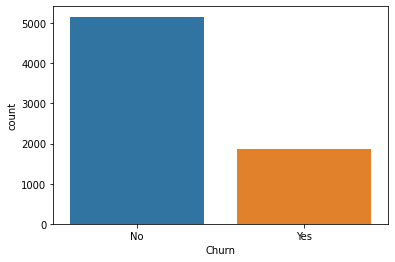

In [7]:
sns.countplot(data=df, x='Churn');

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

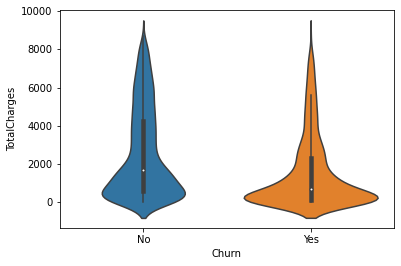

In [8]:
sns.violinplot(x='Churn', y='TotalCharges', data=df);

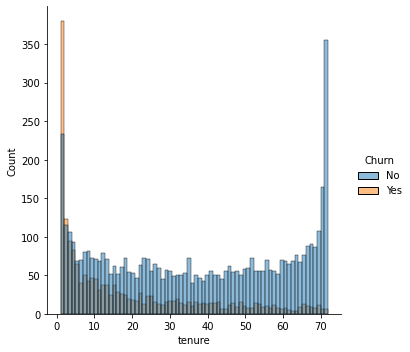

In [9]:
sns.displot(data=df, x='tenure', hue='Churn', bins=72);

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

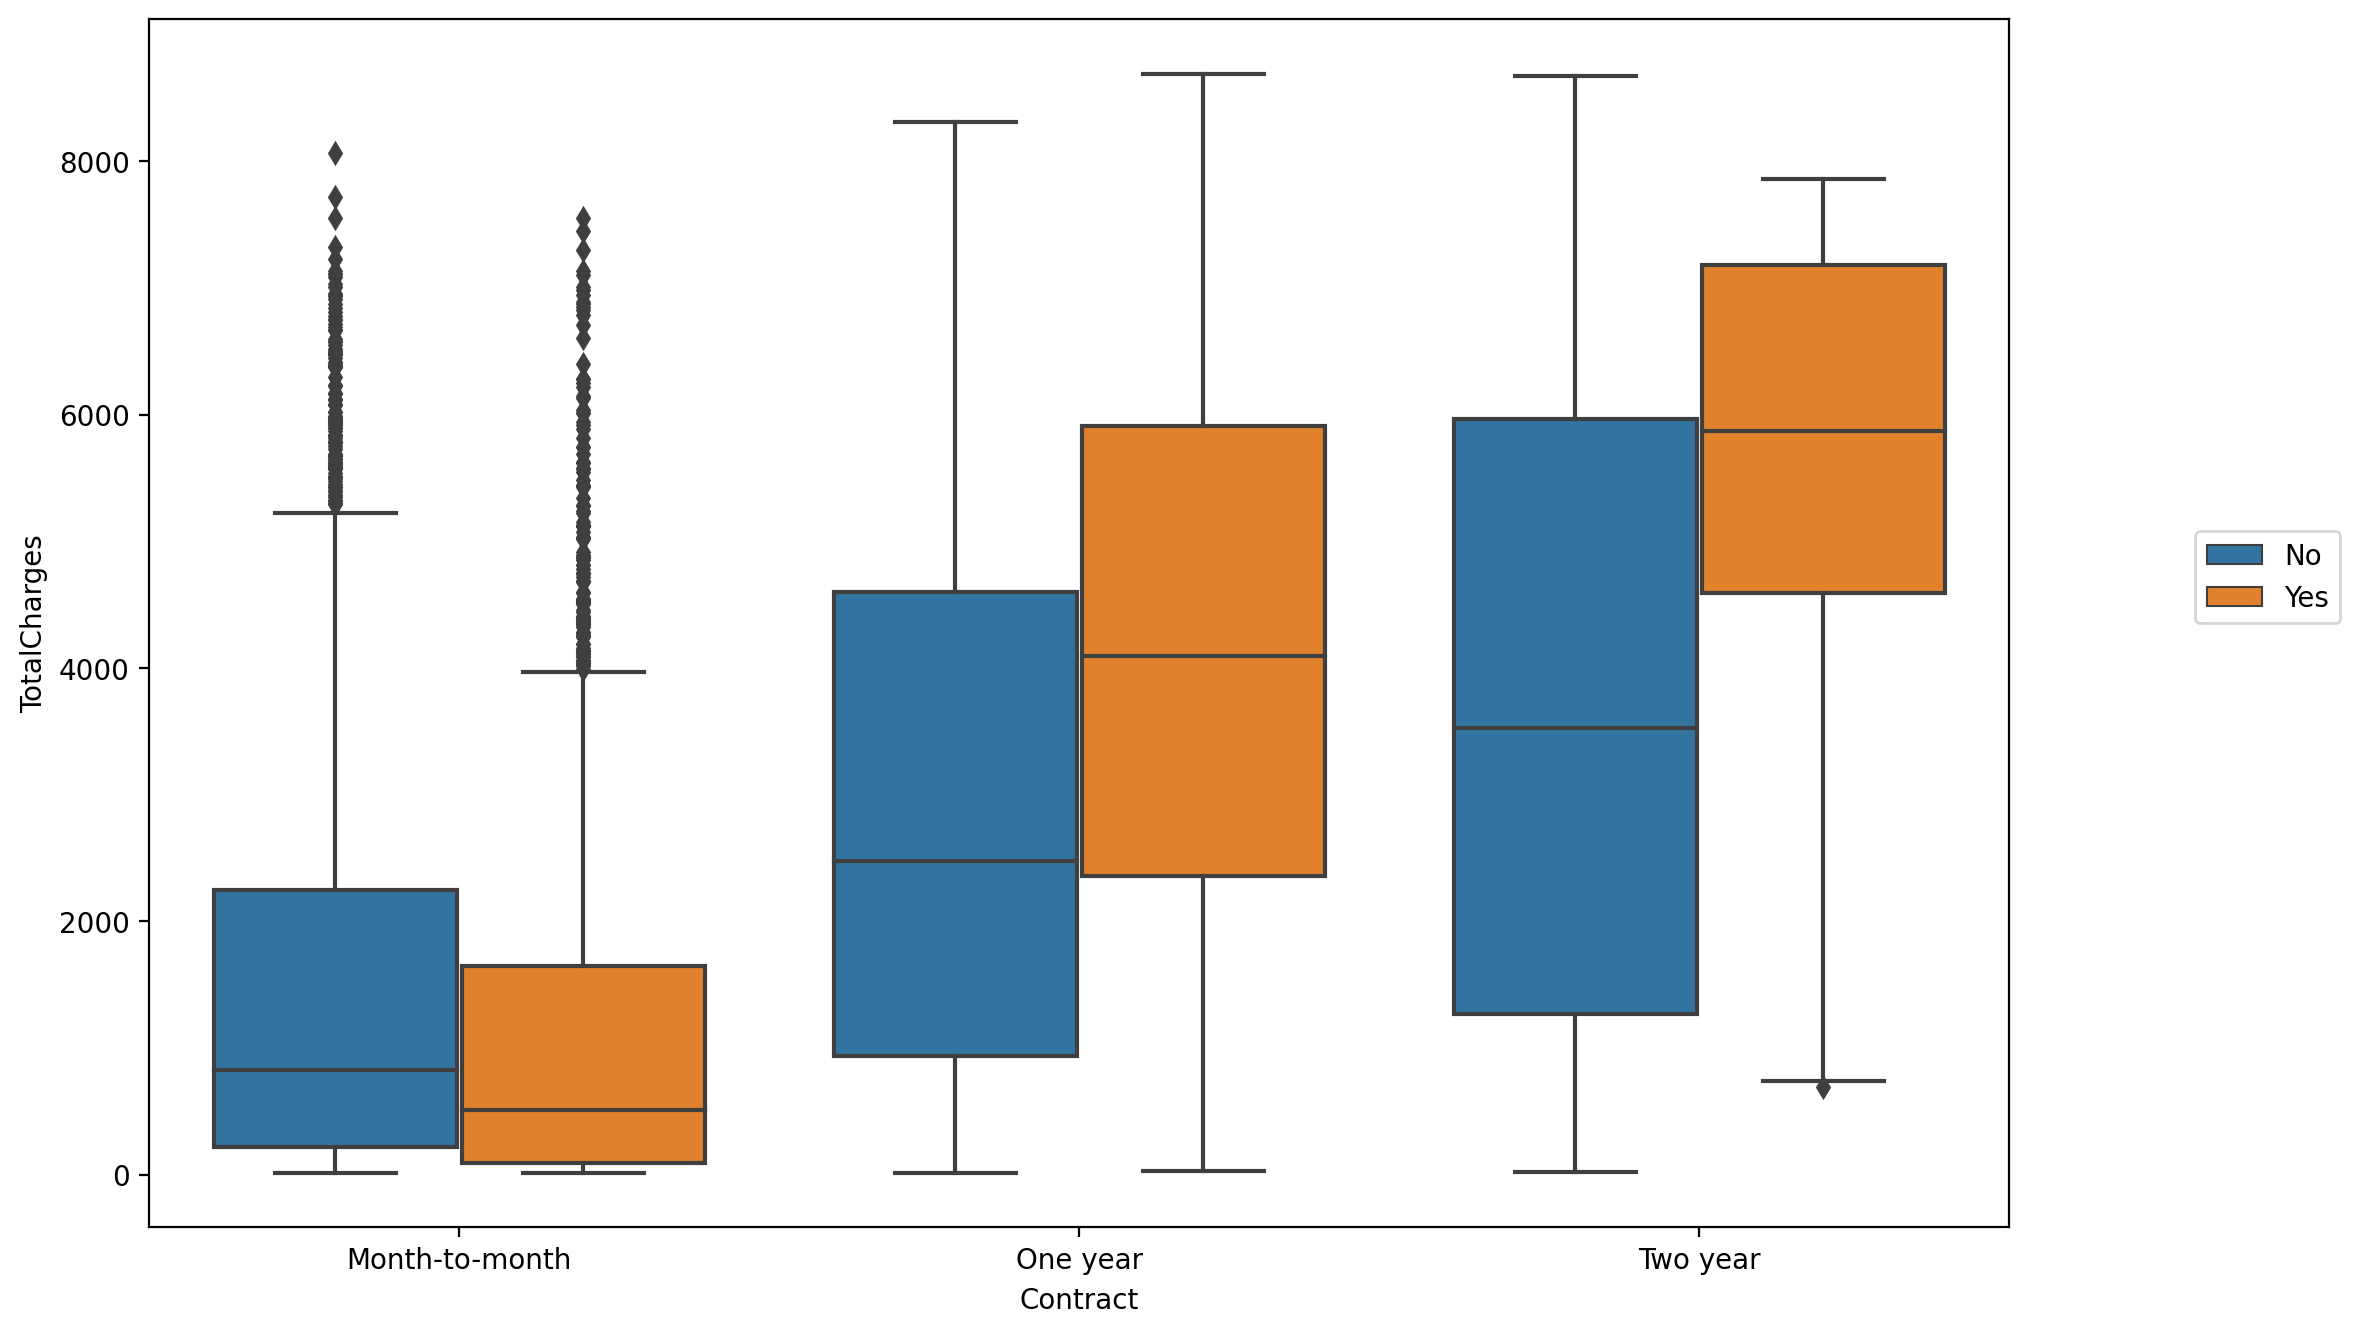

In [10]:
plt.figure(figsize=(12,8), dpi=200)
sns.boxplot(x='Contract', y='TotalCharges', data=df, hue='Churn')
plt.legend(loc=(1.1, 0.5))
plt.show()

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df_cat = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

In [13]:
df_dum = pd.get_dummies(df_cat, drop_first=False)

In [14]:
feature_correlation = df_dum.corr()['Churn_Yes'].sort_values()[1:-1]
len(feature_correlation)

42

In [15]:
type(feature_correlation)

pandas.core.series.Series

In [16]:
feature_correlation.index

Index(['Contract_Two year', 'DeviceProtection_No internet service',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'InternetService_No',
       'TechSupport_No internet service', 'OnlineBackup_No internet service',
       'OnlineSecurity_No internet service', 'PaperlessBilling_No',
       'Contract_One year', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'Dependents_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)', 'InternetService_DSL',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'PhoneService_No', 'gender_Male',
       'gender_Female', 'PhoneService_Yes', 'MultipleLines_Yes',
       'StreamingMovies_Yes', 'StreamingTV_Yes', 'StreamingTV_No',
       'StreamingMovies_No', 'Partner_No', 'SeniorCitizen', 'Dependents_No',
       'PaperlessBilling_Yes', 'DeviceProtection_No', 'Online

In [17]:
df_corr = pd.DataFrame(data=feature_correlation)
df_corr

Churn_Yes
Contract_Two year                        -0.301552
DeviceProtection_No internet service     -0.227578
StreamingMovies_No internet service      -0.227578
StreamingTV_No internet service          -0.227578
InternetService_No                       -0.227578
TechSupport_No internet service          -0.227578
OnlineBackup_No internet service         -0.227578
OnlineSecurity_No internet service       -0.227578
PaperlessBilling_No                      -0.191454
Contract_One year                        -0.178225
OnlineSecurity_Yes                       -0.171270
TechSupport_Yes                          -0.164716
Dependents_Yes                           -0.163128
Partner_Yes                              -0.149982
PaymentMethod_Credit card (automatic)    -0.134687
InternetService_DSL                      -0.124141
PaymentMethod_Bank transfer (automatic)  -0.118136
PaymentMethod_Mailed check               -0.090773
OnlineBackup_Yes                         -0.082307
DeviceProtection_Yes                     -0.066193
MultipleLines_No                         -0.032654
MultipleLines_No phone service           -0.011691
PhoneService_No                          -0.011691
gender_Male                              -0.008545
gender_Female                             0.008545
PhoneService_Yes                          0.011691
MultipleLines_Yes                         0.040033
StreamingMovies_Yes                       0.060860
StreamingTV_Yes                           0.063254
StreamingTV_No                            0.128435
StreamingMovies_No                        0.130920
Partner_No                                0.149982
SeniorCitizen                             0.150541
Dependents_No                             0.163128
PaperlessBilling_Yes                      0.191454
DeviceProtection_No                       0.252056
OnlineBackup_No                           0.267595
PaymentMethod_Electronic check            0.301455
InternetService_Fiber optic               0.307463
TechSupport_No                            0.336877
OnlineSecurity_No                         0.342235
Contract_Month-to-month                   0.404565

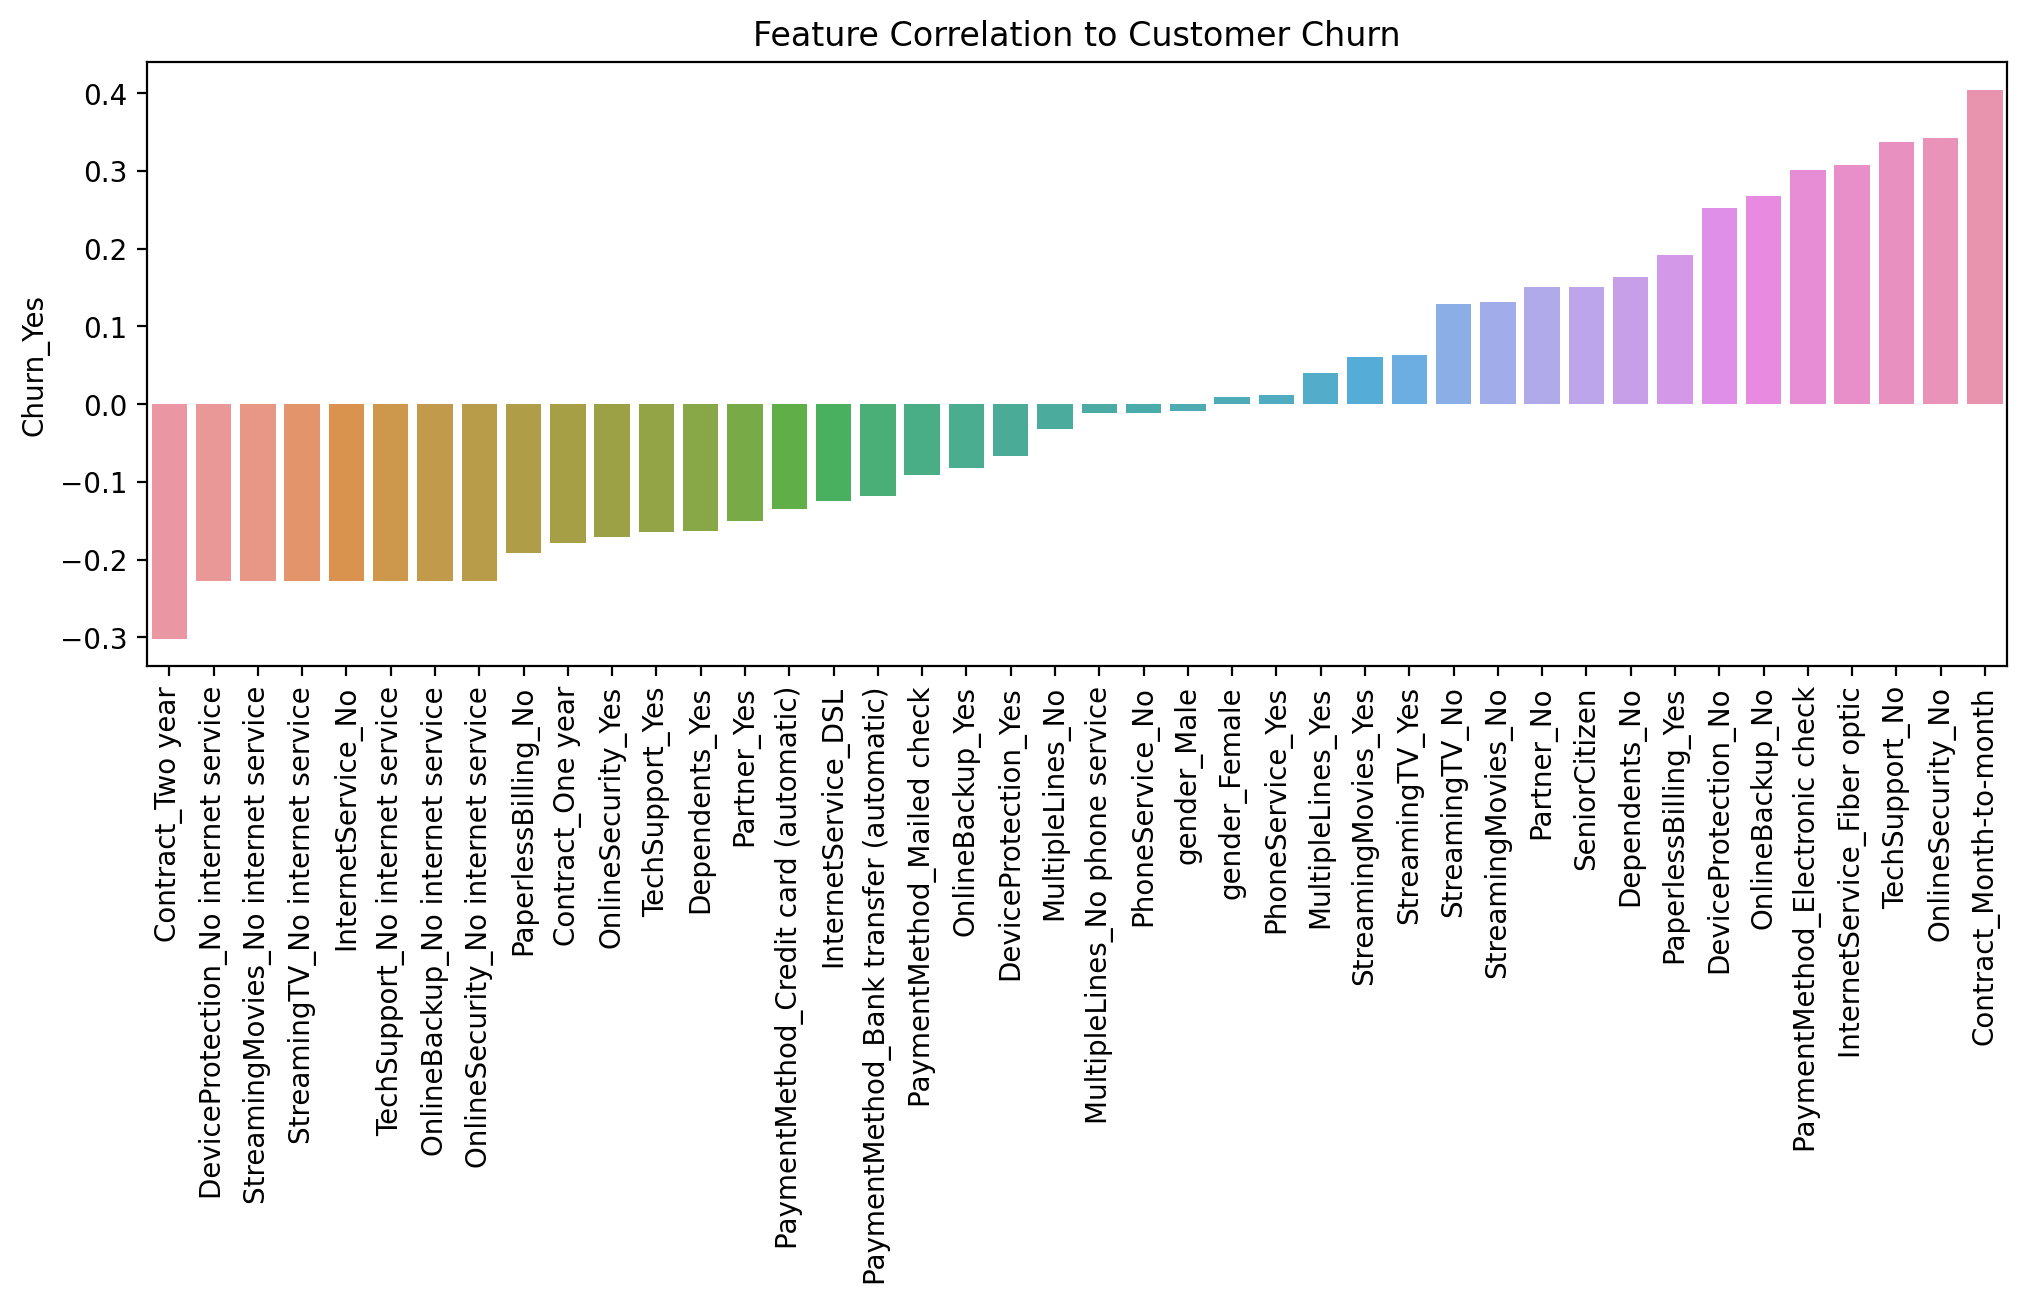

In [18]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(x=df_corr.index, y='Churn_Yes', data=df_corr)
plt.xticks(rotation=90)
plt.title("Feature Correlation to Customer Churn")
plt.show()

In [19]:
print("These are the 5 features most positively correlated to customer churn: ")
df_corr['Churn_Yes'].nlargest(5)

These are the 5 features most positively correlated to customer churn: 


Contract_Month-to-month           0.404565
OnlineSecurity_No                 0.342235
TechSupport_No                    0.336877
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
Name: Churn_Yes, dtype: float64

In [20]:
print("These are the 5 features most negatively correlated to customer churn: ")
df_corr['Churn_Yes'].nsmallest(5)

These are the 5 features most negatively correlated to customer churn: 


Contract_Two year                      -0.301552
DeviceProtection_No internet service   -0.227578
StreamingMovies_No internet service    -0.227578
StreamingTV_No internet service        -0.227578
InternetService_No                     -0.227578
Name: Churn_Yes, dtype: float64

### Solution

In [21]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [22]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

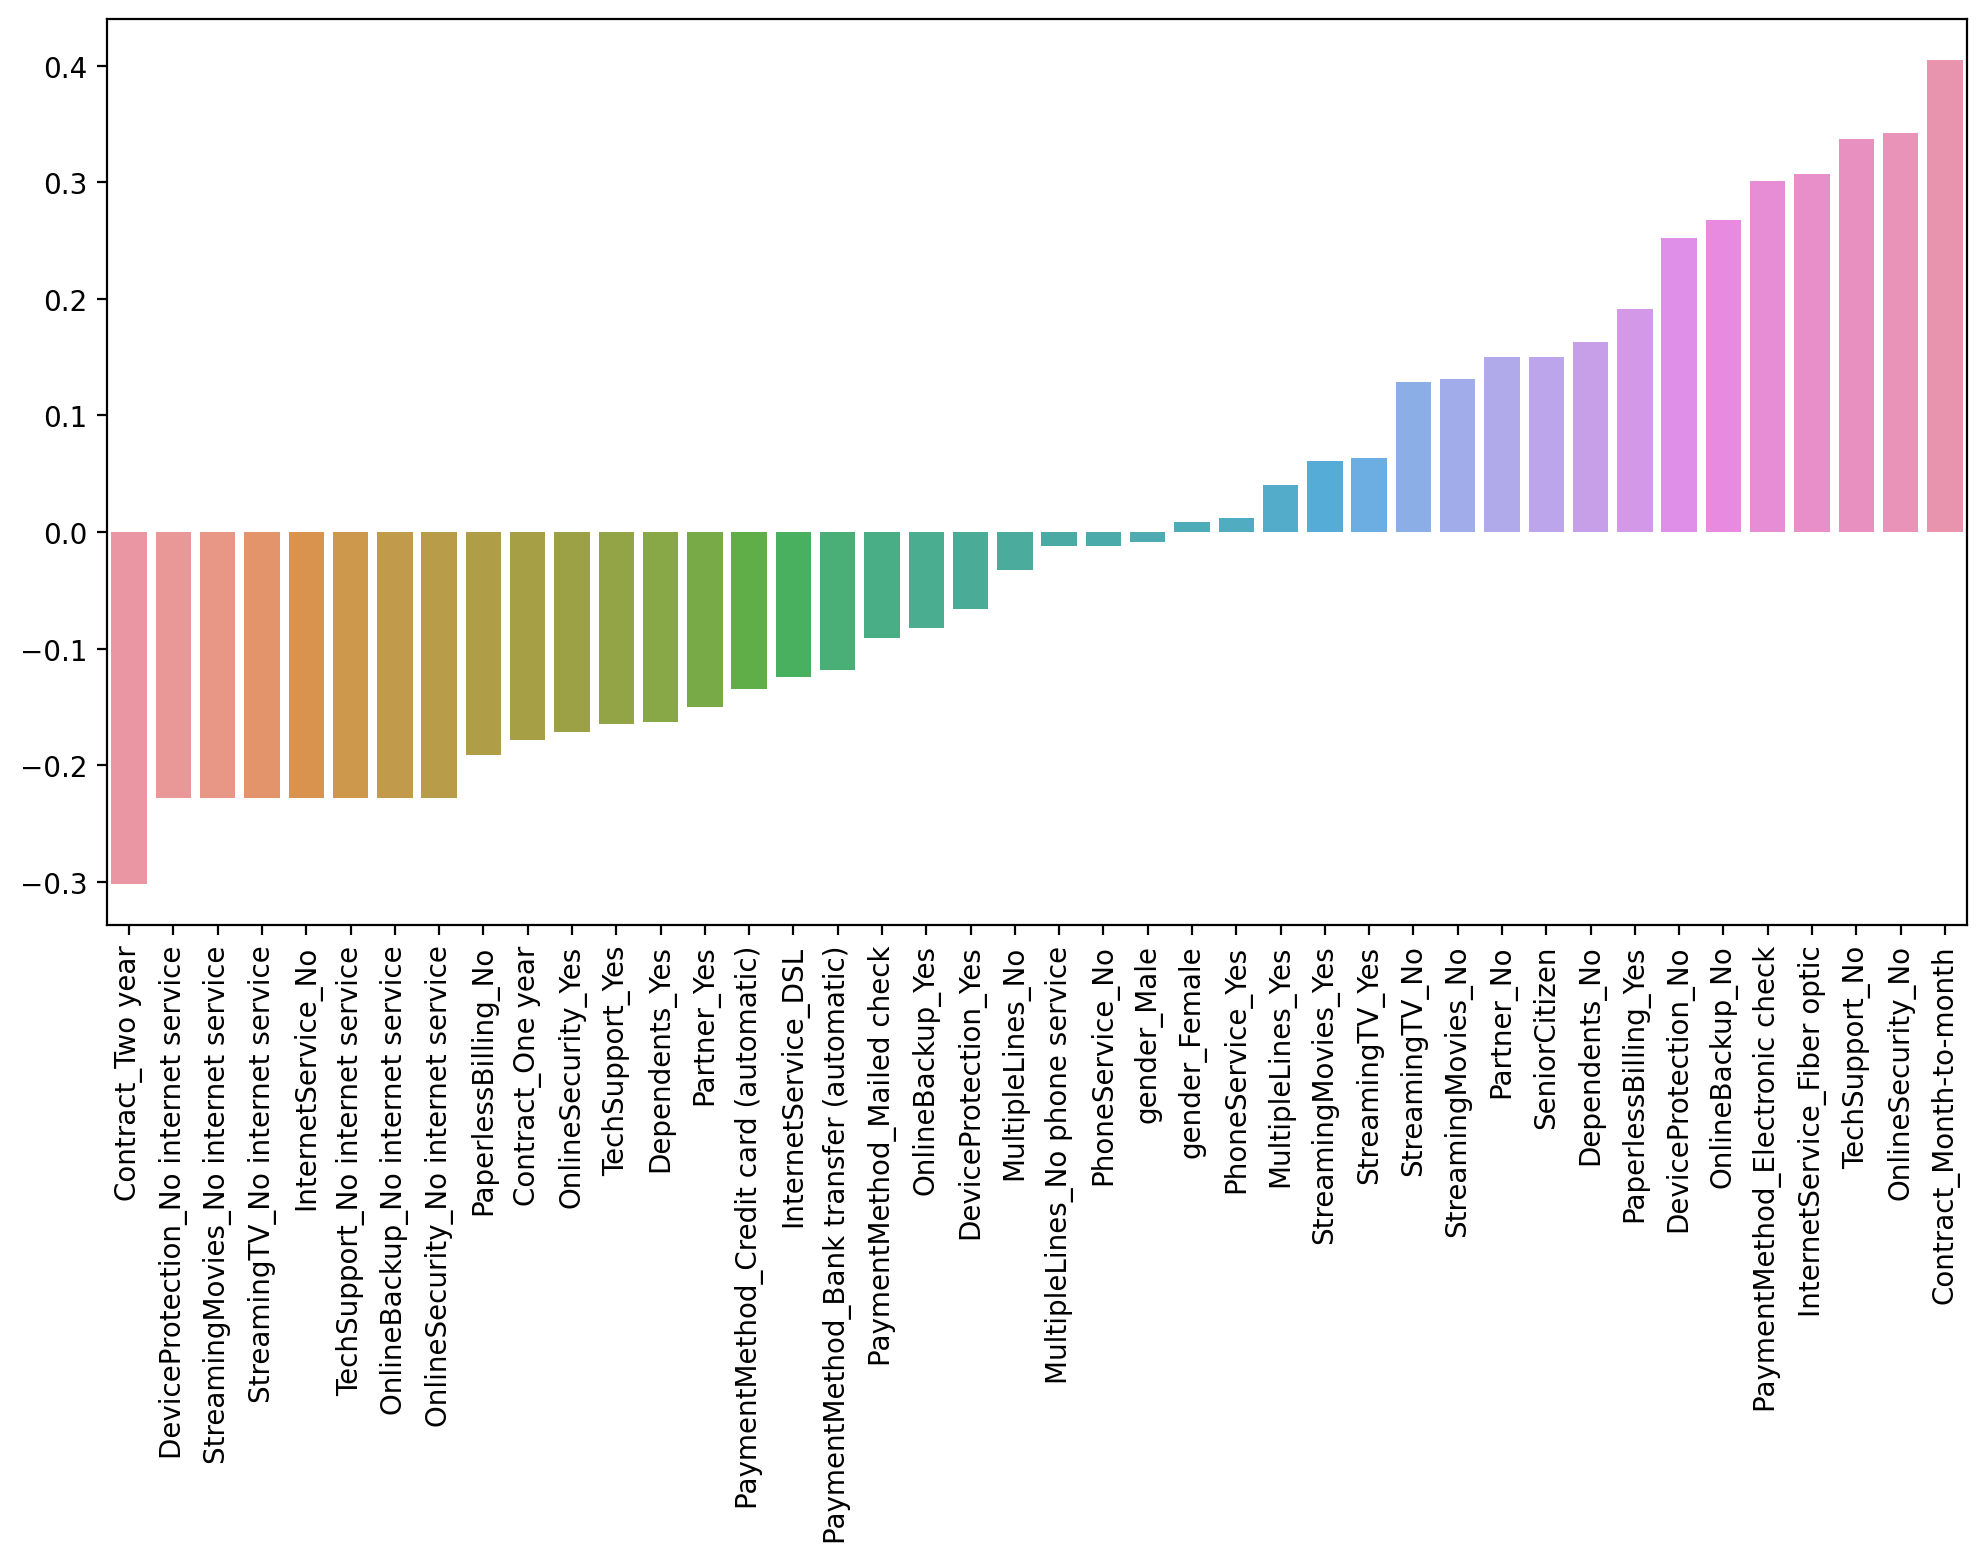

In [23]:
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.xticks(rotation=90)
plt.show()

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [24]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [25]:
df['tenure'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72], dtype=int64)

In [26]:
len(df['tenure'].sort_values().unique())

72

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

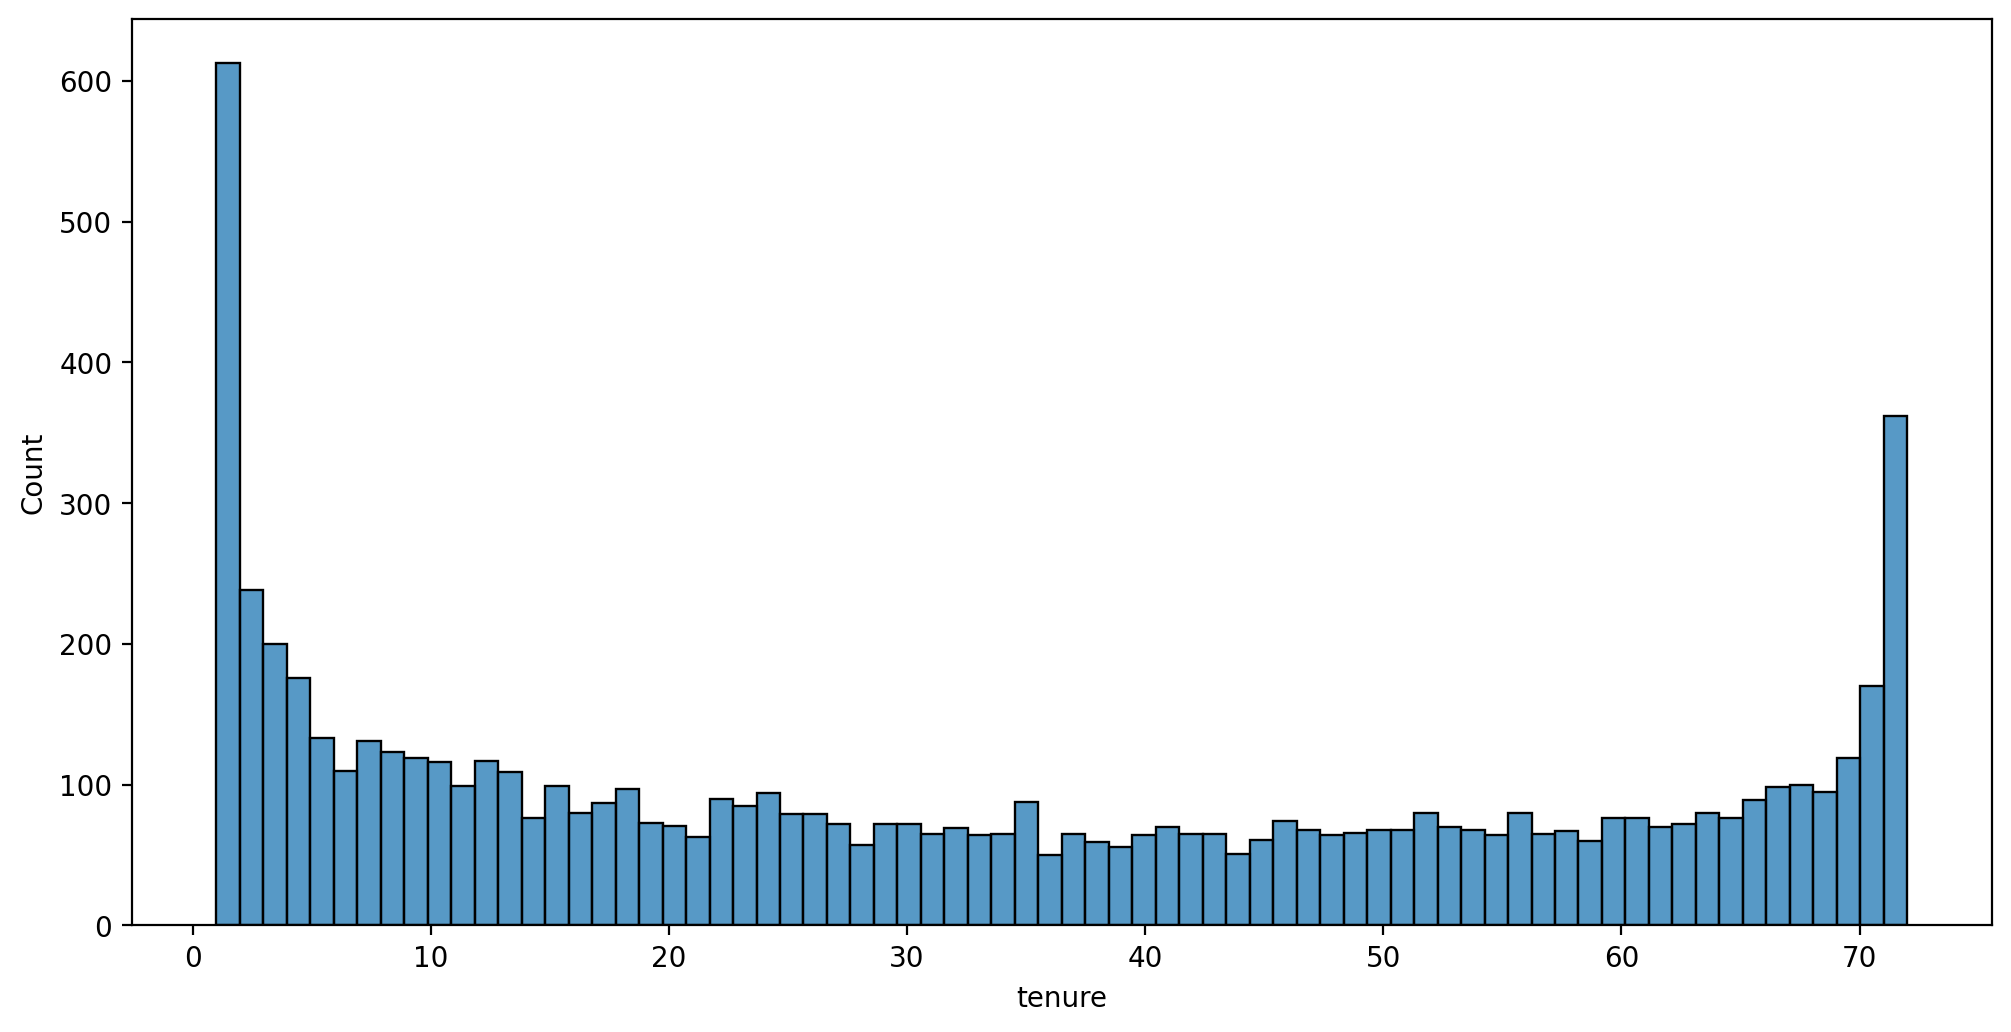

In [27]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='tenure', bins=72)
plt.show()

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

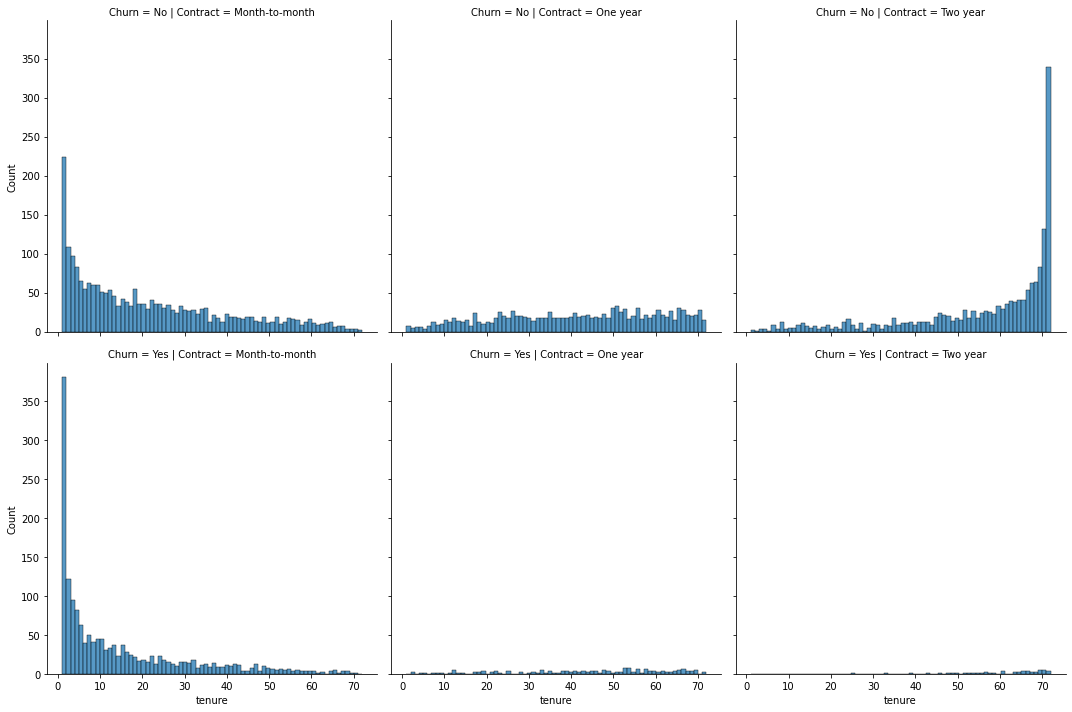

In [28]:
sns.displot(data=df,
            x='tenure',
            bins=72,
            col='Contract',
            row='Churn');

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

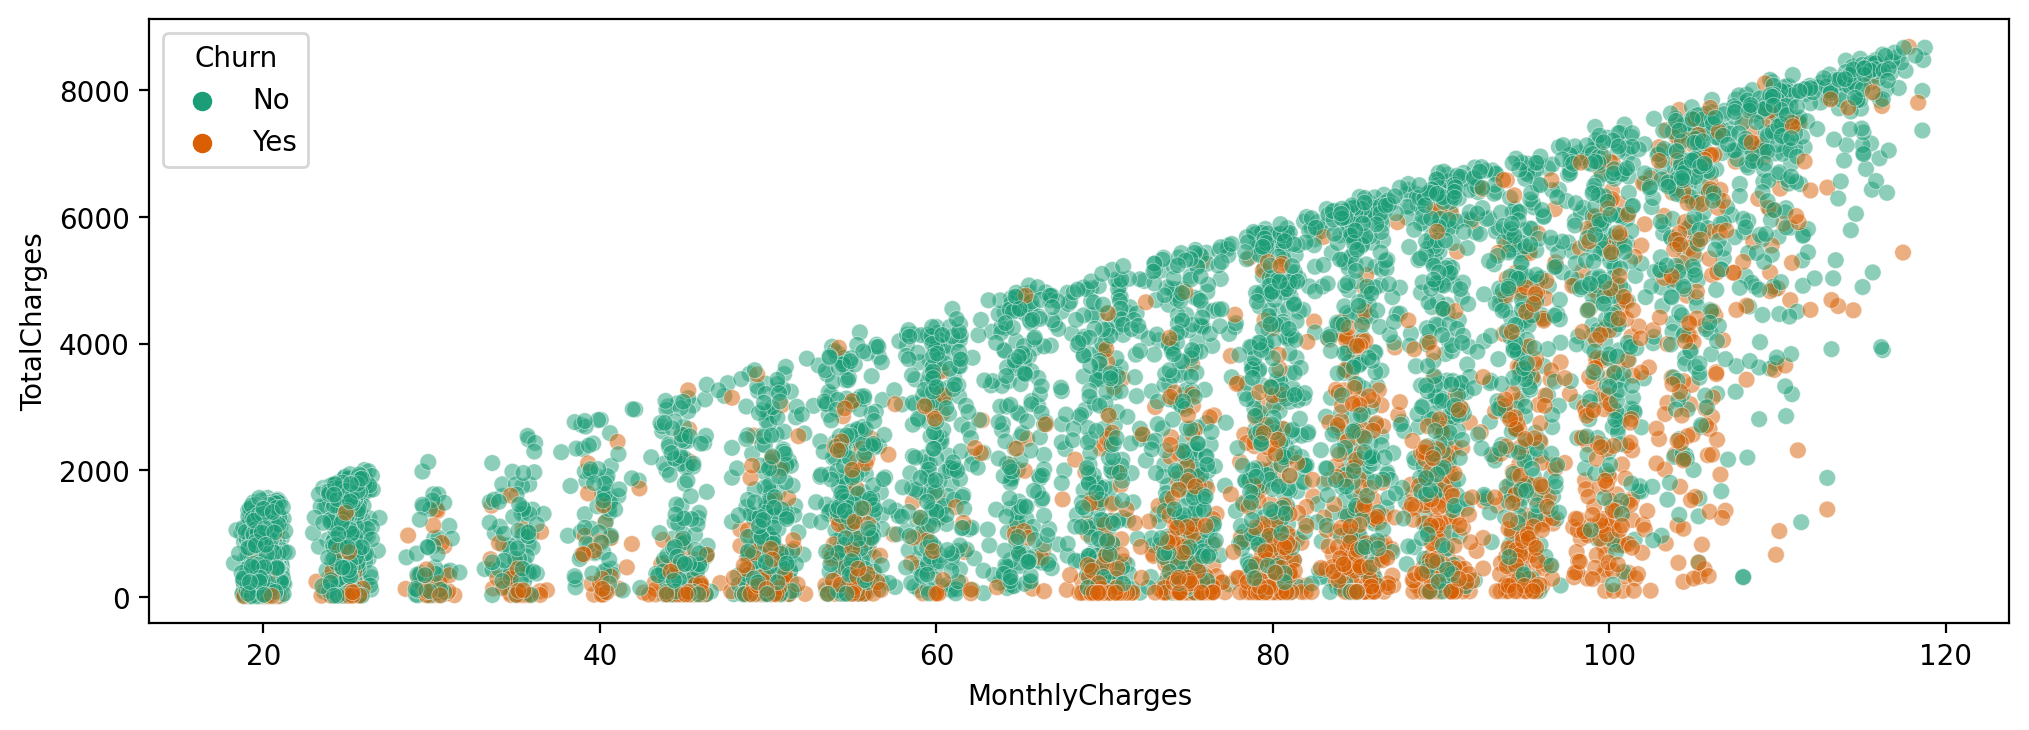

In [30]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df,
                hue='Churn', alpha=0.5, linewidth=0.3, palette='Dark2')

plt.show()

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [31]:
df_ten = df[['tenure', 'Churn']]
churn = df_ten['Churn'].map({'Yes': 1, 'No': 0})
df_ten['churn'] = churn
df_ten = df_ten.drop('Churn', axis=1)
df_ten

<ipython-input-31-fd8c4af2d681>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ten['churn'] = churn


tenure  churn
0          1      0
1         34      0
2          2      1
3         45      0
4          2      1
...      ...    ...
7027      24      0
7028      72      0
7029      11      0
7030       4      1
7031      66      0

[7032 rows x 2 columns]

In [32]:
cohort_churn = df_ten.groupby('tenure').sum()['churn']
cohort_churn.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72],
           dtype='int64', name='tenure')

In [33]:
cohort_total = df_ten.groupby('tenure').count()['churn']

In [34]:
df_cohort = pd.concat([cohort_total, cohort_churn], axis=1)
df_cohort.columns = ['total', 'churn']
df_cohort['rate'] = 100.0 * (df_cohort['churn'] / df_cohort['total'])
df_cohort

total  churn       rate
tenure                         
1         613    380  61.990212
2         238    123  51.680672
3         200     94  47.000000
4         176     83  47.159091
5         133     64  48.120301
...       ...    ...        ...
68        100      9   9.000000
69         95      8   8.421053
70        119     11   9.243697
71        170      6   3.529412
72        362      6   1.657459

[72 rows x 3 columns]

### Solution

In [35]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [36]:
churn_rate = 100 * yes_churn / (yes_churn + no_churn)
churn_rate.transpose()['TotalCharges']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: TotalCharges, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [37]:
x = df_cohort.index
y = df_cohort['rate']

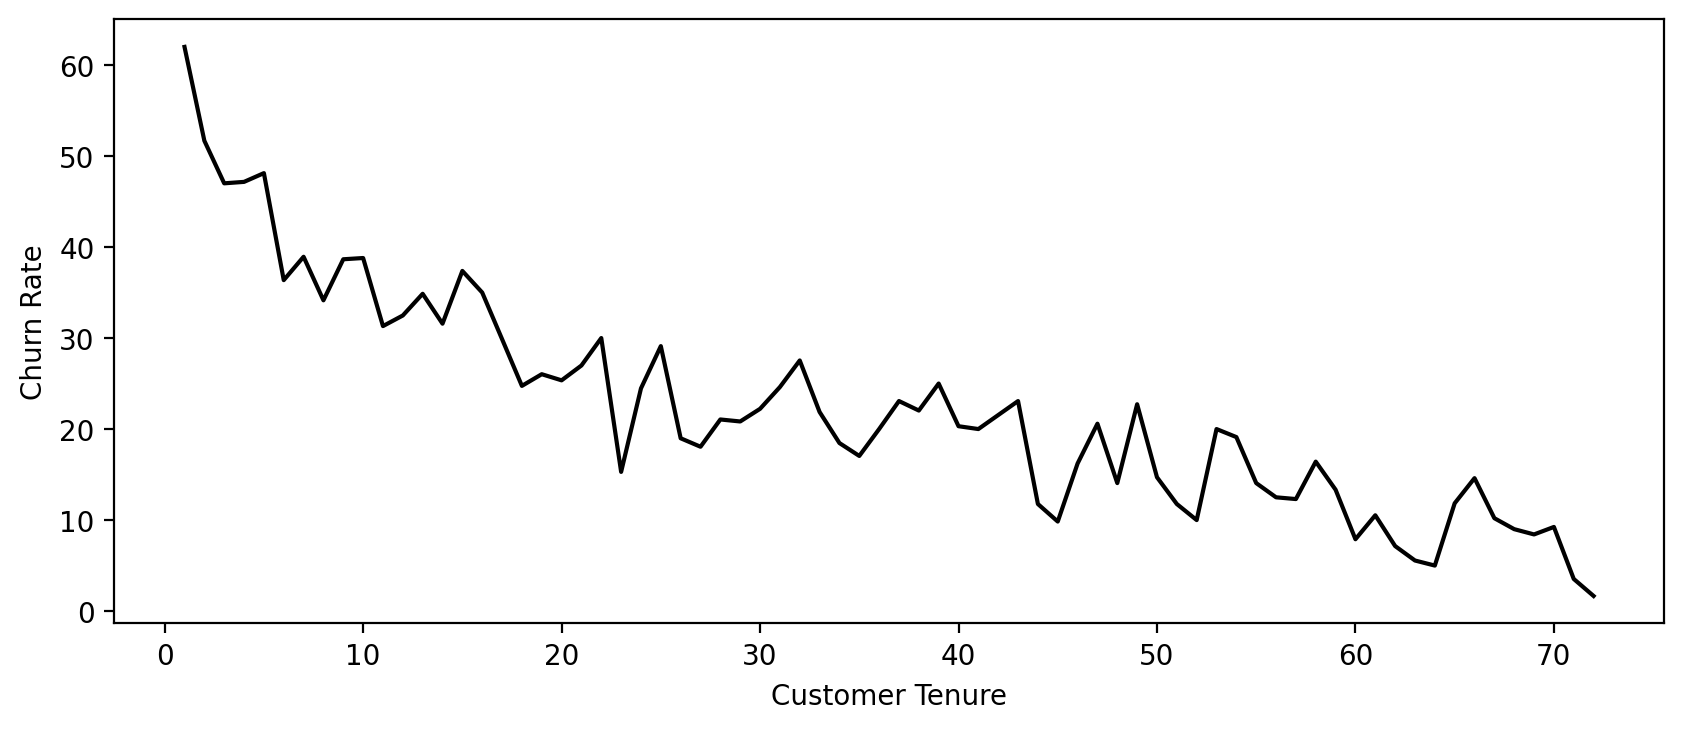

In [38]:
plt.figure(figsize=(10,4), dpi=200)

plt.plot(x, y, 'k-')
plt.xlabel('Customer Tenure')
plt.ylabel('Churn Rate')

plt.show()

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

### Solution

In [39]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '13-24 Months'
    elif tenure < 49:
        return '25-48 Months'
    else:
        return 'Over 48 Months'

In [40]:
df['Tenure_Cohort'] = df['tenure'].apply(cohort)

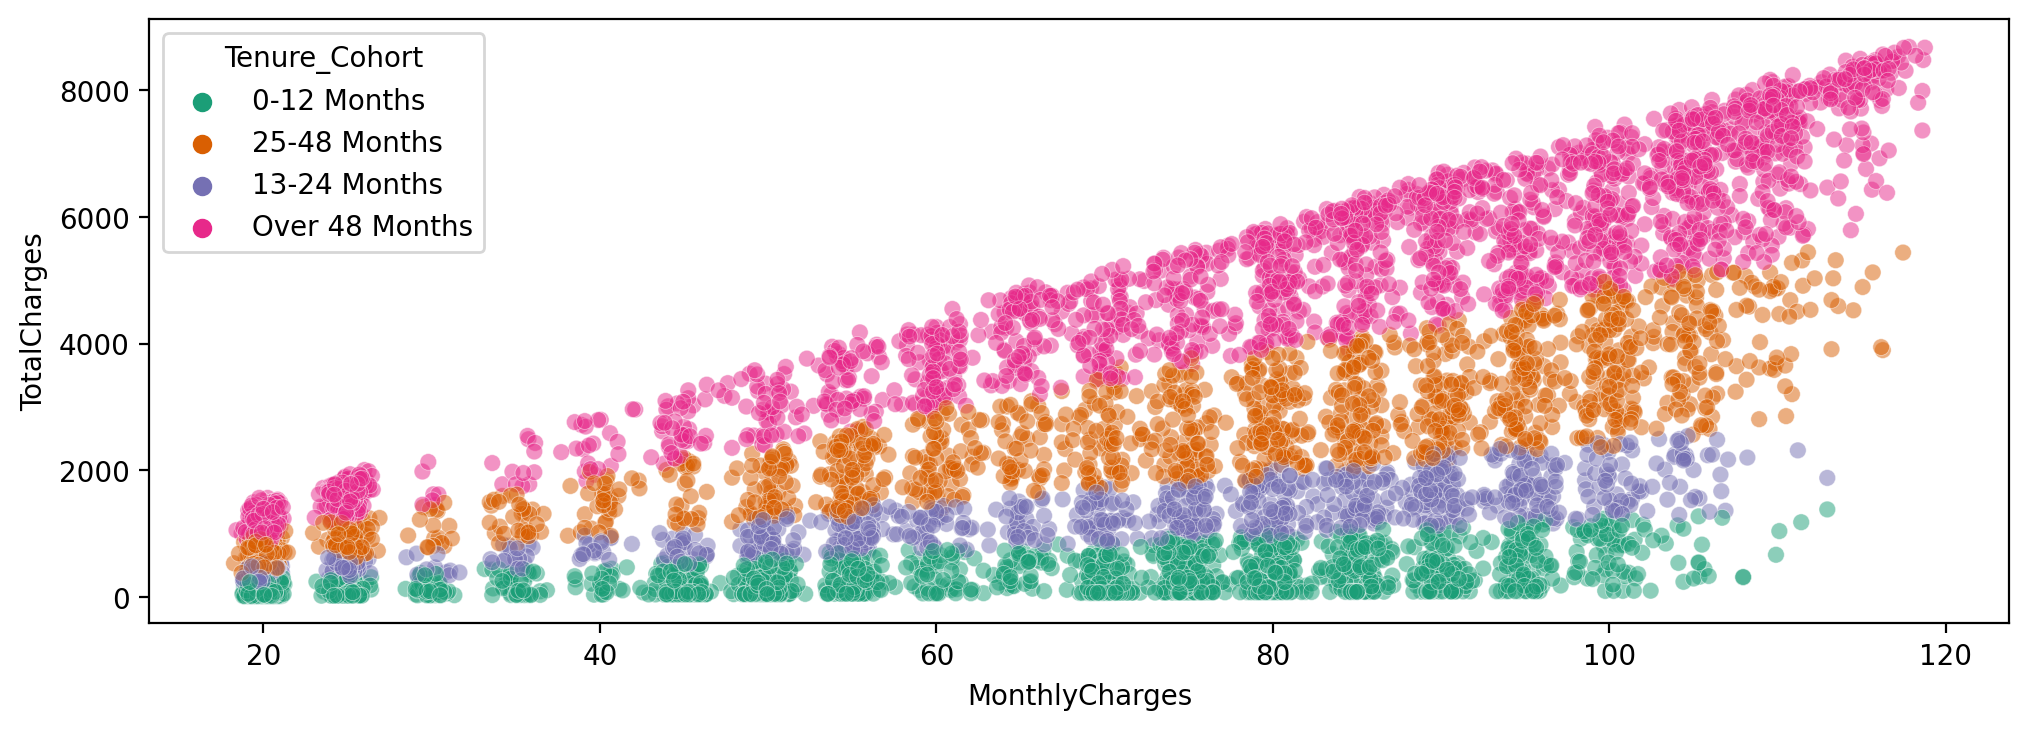

In [41]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df,
                hue='Tenure_Cohort', alpha=0.5, linewidth=0.3, palette='Dark2')

plt.show()

### My Results

In [42]:
def get_cohort(tenure):
    cohort_limits = [12, 24, 48]
    cohort_categories = ['1-12 Months', '13-24 Months', '25-48 Months', 'Over 48 Months']
    
    if (tenure <= cohort_limits[0]):
        return cohort_categories[0]
    elif (tenure > cohort_limits[0] and tenure <= cohort_limits[1]):
        return cohort_categories[1]
    elif (tenure > cohort_limits[1] and tenure <= cohort_limits[2]):
        return cohort_categories[2]
    else:
        return cohort_categories[3]

In [43]:
df['TenureCohort'] = df['tenure'].apply(get_cohort)
df[['tenure', 'TenureCohort']]

tenure    TenureCohort
0          1     1-12 Months
1         34    25-48 Months
2          2     1-12 Months
3         45    25-48 Months
4          2     1-12 Months
...      ...             ...
7027      24    13-24 Months
7028      72  Over 48 Months
7029      11     1-12 Months
7030       4     1-12 Months
7031      66  Over 48 Months

[7032 rows x 2 columns]

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

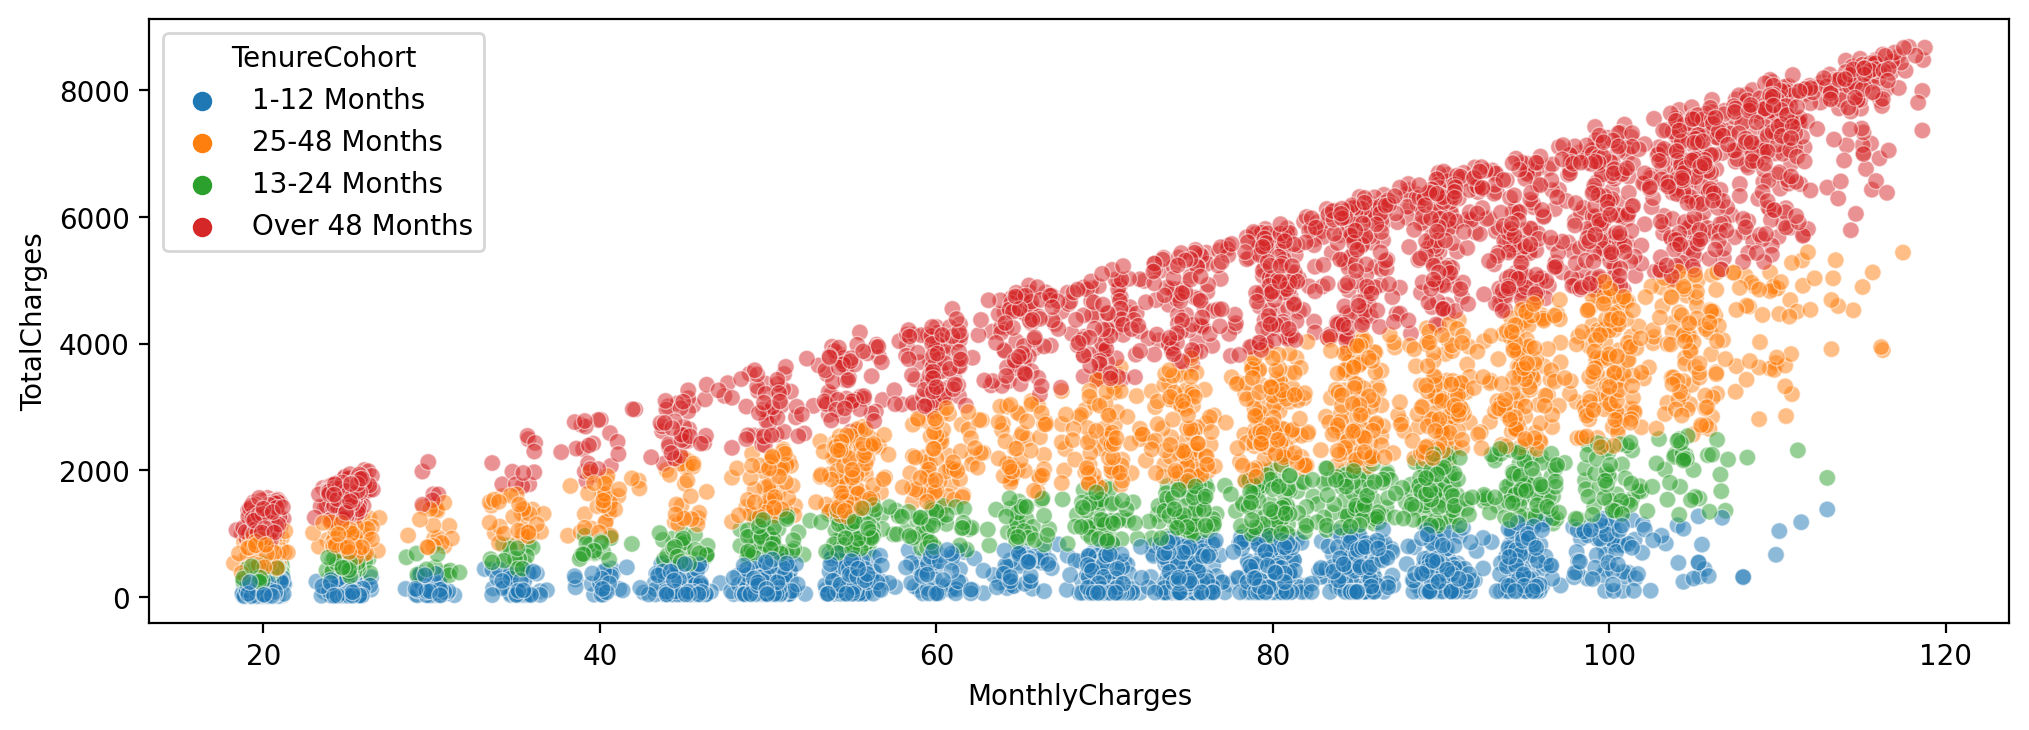

In [44]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df,
                hue='TenureCohort', alpha=0.5)

plt.show()

**TASK: Create a count plot showing the churn count per cohort.**

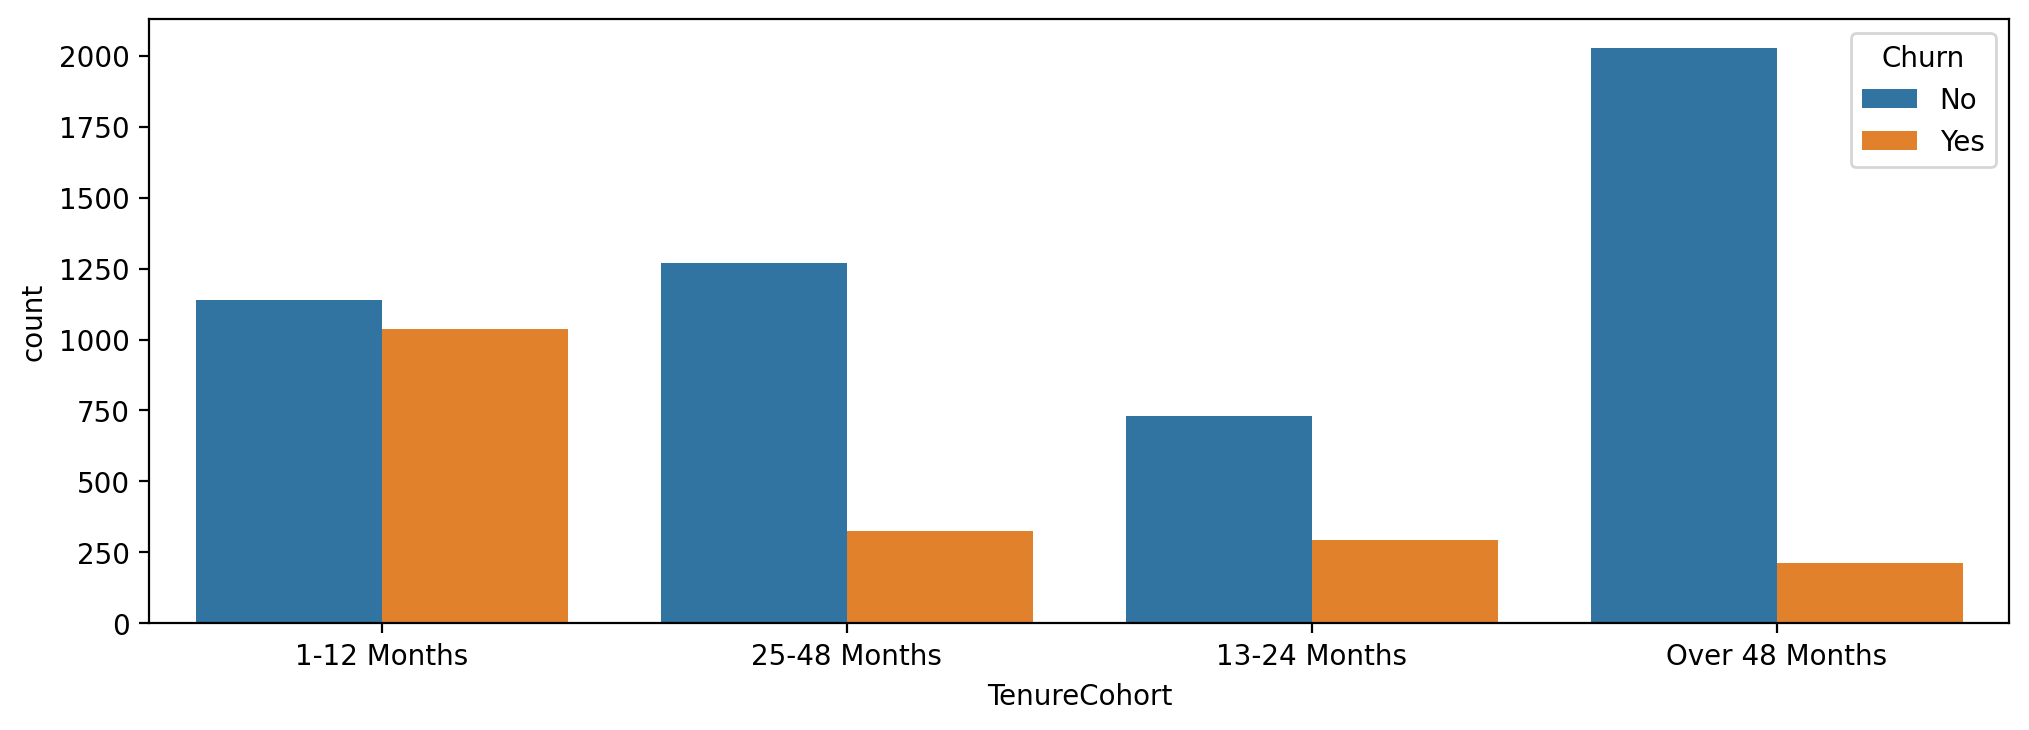

In [45]:
plt.figure(figsize=(12,4), dpi=200)
sns.countplot(x='TenureCohort', data=df, hue='Churn')
plt.show()

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

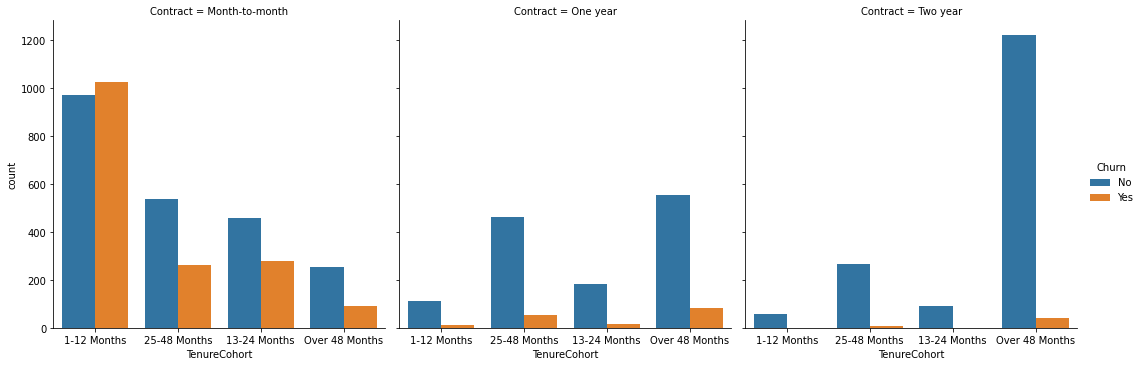

In [46]:
# plt.figure(figsize=(12,4), dpi=200)
sns.catplot(x='TenureCohort', data=df, hue='Churn',
            kind='count', col='Contract');

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [48]:
# df = df.drop(['tenure_cohort', 'customerID'], axis=1)

In [50]:
df = df.drop(['TenureCohort'], axis=1)

KeyError: "['TenureCohort'] not found in axis"

In [51]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_Cohort'],
      dtype='object')

In [52]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [53]:
df_cat = df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

df_cont = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']]

In [54]:
df_cont

tenure  MonthlyCharges  TotalCharges  SeniorCitizen
0          1           29.85         29.85              0
1         34           56.95       1889.50              0
2          2           53.85        108.15              0
3         45           42.30       1840.75              0
4          2           70.70        151.65              0
...      ...             ...           ...            ...
7027      24           84.80       1990.50              0
7028      72          103.20       7362.90              0
7029      11           29.60        346.45              0
7030       4           74.40        306.60              1
7031      66          105.65       6844.50              0

[7032 rows x 4 columns]

In [55]:
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               0            1               0                 0   
1               1            0               0                 1   
2               1            0               0                 1   
3               1            0               0                 0   
4               0            0               0                 1   
...           ...          ...             ...               ...   
7027            1            1               1                 1   
7028            0            1               1                 1   
7029            0            1               1                 0   
7030            1            1               0                 1   
7031            1            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  \
0                                  1                  0   
1                                  0                  0   
2                                  0                  0   
3                                  1                  0   
4                                  0                  0   
...                              ...                ...   
7027                               0                  1   
7028                               0                  1   
7029                               1                  0   
7030                               0                  1   
7031                               0                  0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7027                            0                   0   
7028                            1                   0   
7029                            0                   0   
7030                            1                   0   
7031                            1                   0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
0                                      0                   0  ...   
1                                      0                   1  ...   
2                                      0                   1  ...   
3                                      0                   1  ...   
4                                      0                   0  ...   
...                                  ...                 ...  ...   
7027                                   0                   1  ...   
7028                                   0                   0  ...   
7029                                   0                   1  ...   
7030                                   0                   0  ...   
7031                                   0                   1  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
0                                   0                0   
1                                   0                0   
2                                   0                0   
3                                   0                0   
4                                   0                0   
...                               ...              ...   
7027                                0                1   
7028                                0                1   
7029                                0                0   
7030                                0                0   
7031                                0                1   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                       0                    0   
1                                       0                    0   
2                                       0                    0   
3    

In [58]:
df2 = pd.concat([df_cont, df_dummies, df['Churn']], axis=1)
df2

tenure  MonthlyCharges  TotalCharges  SeniorCitizen  gender_Male  \
0          1           29.85         29.85              0            0   
1         34           56.95       1889.50              0            1   
2          2           53.85        108.15              0            1   
3         45           42.30       1840.75              0            1   
4          2           70.70        151.65              0            0   
...      ...             ...           ...            ...          ...   
7027      24           84.80       1990.50              0            1   
7028      72          103.20       7362.90              0            0   
7029      11           29.60        346.45              0            0   
7030       4           74.40        306.60              1            1   
7031      66          105.65       6844.50              0            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1               0               0                 1   
2               0               0                 1   
3               0               0                 0   
4               0               0                 1   
...           ...             ...               ...   
7027            1               1                 1   
7028            1               1                 1   
7029            1               1                 0   
7030            1               0                 1   
7031            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                                  1                  0  ...                0   
1                                  0                  0  ...                0   
2                                  0                  0  ...                0   
3                                  1                  0  ...                0   
4                                  0                  0  ...                0   
...                              ...                ...  ...              ...   
7027                               0                  1  ...                1   
7028                               0                  1  ...                1   
7029                               1                  0  ...                0   
7030                               0                  1  ...                0   
7031                               0                  0  ...                1   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                       0                    0   
1                                       0                    0   
2                                       0                    0   
3                                       0                    0   
4                                       0                    0   
...                                   ...                  ...   
7027                                    0                    1   
7028                                    0                    1   
7029                                    0                    0   
7030                                    0                    0   
7031                                    0                    1   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                     0                  0                     1   
1                     1                  0                     0   
2                     0                  0                     1   
3                     1                  0                     0   
4                     0                  0                     1   
...                 ...                ...                   ...   
7027                  1                  0                     1   
7028                  1                  0                     1   
7029                  0                  0                     1   
7030      

In [59]:
X = df2.drop('Churn', axis=1)
y = df2['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [62]:
# 1. Train a single decision tree
from sklearn.tree import DecisionTreeClassifier

In [63]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [64]:
errors = []
N = 30

for n in range (2, N):
    model = DecisionTreeClassifier(max_depth=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    e = 1 - accuracy_score(y_test, y_pred)
    errors.append(e)

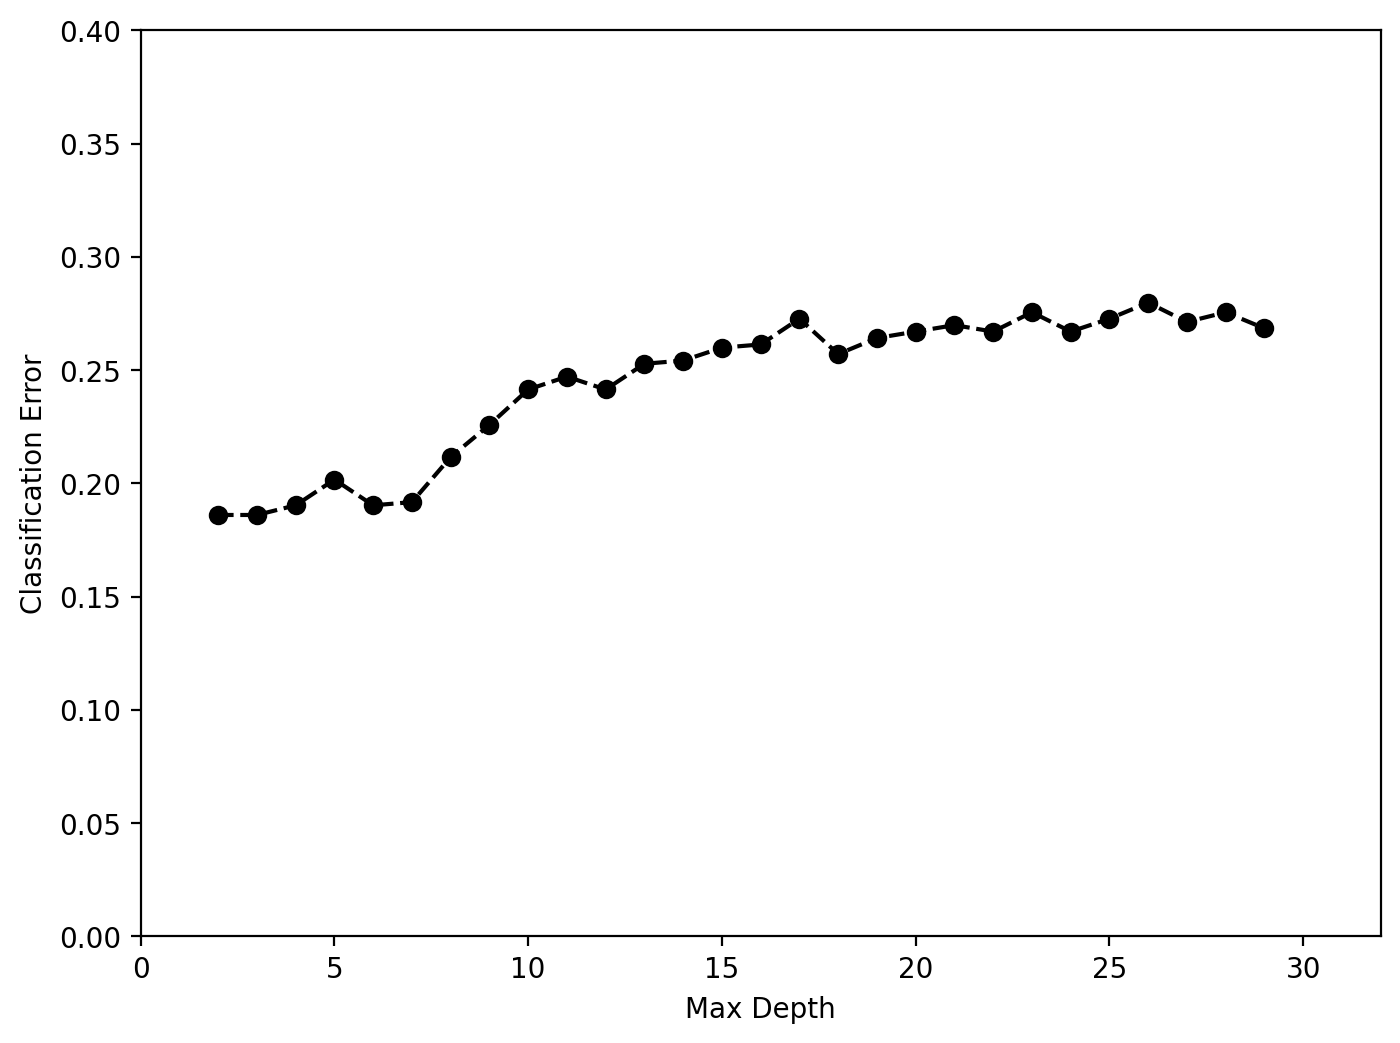

In [65]:
plt.figure(figsize=(8,6), dpi=200)
plt.plot(range(2, N), errors, 'ko--')
plt.xlabel('Max Depth')
plt.ylabel('Classification Error')
plt.ylim(0, 0.4)
plt.xlim(0, 32)
plt.show()

In [66]:
errors

[0.18607954545454541,
 0.18607954545454541,
 0.19034090909090906,
 0.20170454545454541,
 0.19034090909090906,
 0.19176136363636365,
 0.2116477272727273,
 0.2258522727272727,
 0.2414772727272727,
 0.24715909090909094,
 0.2414772727272727,
 0.25284090909090906,
 0.25426136363636365,
 0.25994318181818177,
 0.26136363636363635,
 0.2727272727272727,
 0.2571022727272727,
 0.2642045454545454,
 0.2670454545454546,
 0.26988636363636365,
 0.2670454545454546,
 0.27556818181818177,
 0.2670454545454546,
 0.2727272727272727,
 0.2798295454545454,
 0.27130681818181823,
 0.27556818181818177,
 0.26846590909090906]

In [67]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



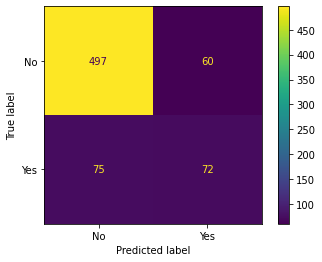

In [68]:
plot_confusion_matrix(model, X_test, y_test);

In [69]:
model.feature_importances_

array([0.42391407, 0.04611481, 0.06416831, 0.01082504, 0.00123697,
       0.        , 0.        , 0.00696195, 0.00088963, 0.01243191,
       0.31406016, 0.02628952, 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ])

In [70]:
feat_imp = pd.DataFrame(data=model.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])
feat_imp.sort_values(by='Importance')

Importance
OnlineBackup_No internet service         0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaperlessBilling_Yes                     0.000000
StreamingMovies_Yes                      0.000000
StreamingMovies_No internet service      0.000000
StreamingTV_Yes                          0.000000
StreamingTV_No internet service          0.000000
TechSupport_No internet service          0.000000
DeviceProtection_Yes                     0.000000
DeviceProtection_No internet service     0.000000
OnlineSecurity_No internet service       0.000000
PaymentMethod_Mailed check               0.000000
Dependents_Yes                           0.000000
Partner_Yes                              0.000000
MultipleLines_No phone service           0.000890
gender_Male                              0.001237
OnlineBackup_Yes                         0.005341
PhoneService_Yes                         0.006962
TechSupport_Yes                          0.007868
OnlineSecurity_Yes                       0.008376
Contract_One year                        0.010021
SeniorCitizen                            0.010825
MultipleLines_Yes                        0.012432
InternetService_No                       0.026290
Contract_Two year                        0.027065
PaymentMethod_Electronic check           0.034436
MonthlyCharges                           0.046115
TotalCharges                             0.064168
InternetService_Fiber optic              0.314060
tenure                                   0.423914

In [71]:
plot_imp = feat_imp[ feat_imp['Importance'] > (10 ** -6) ].sort_values('Importance')
plot_imp

Importance
MultipleLines_No phone service    0.000890
gender_Male                       0.001237
OnlineBackup_Yes                  0.005341
PhoneService_Yes                  0.006962
TechSupport_Yes                   0.007868
OnlineSecurity_Yes                0.008376
Contract_One year                 0.010021
SeniorCitizen                     0.010825
MultipleLines_Yes                 0.012432
InternetService_No                0.026290
Contract_Two year                 0.027065
PaymentMethod_Electronic check    0.034436
MonthlyCharges                    0.046115
TotalCharges                      0.064168
InternetService_Fiber optic       0.314060
tenure                            0.423914

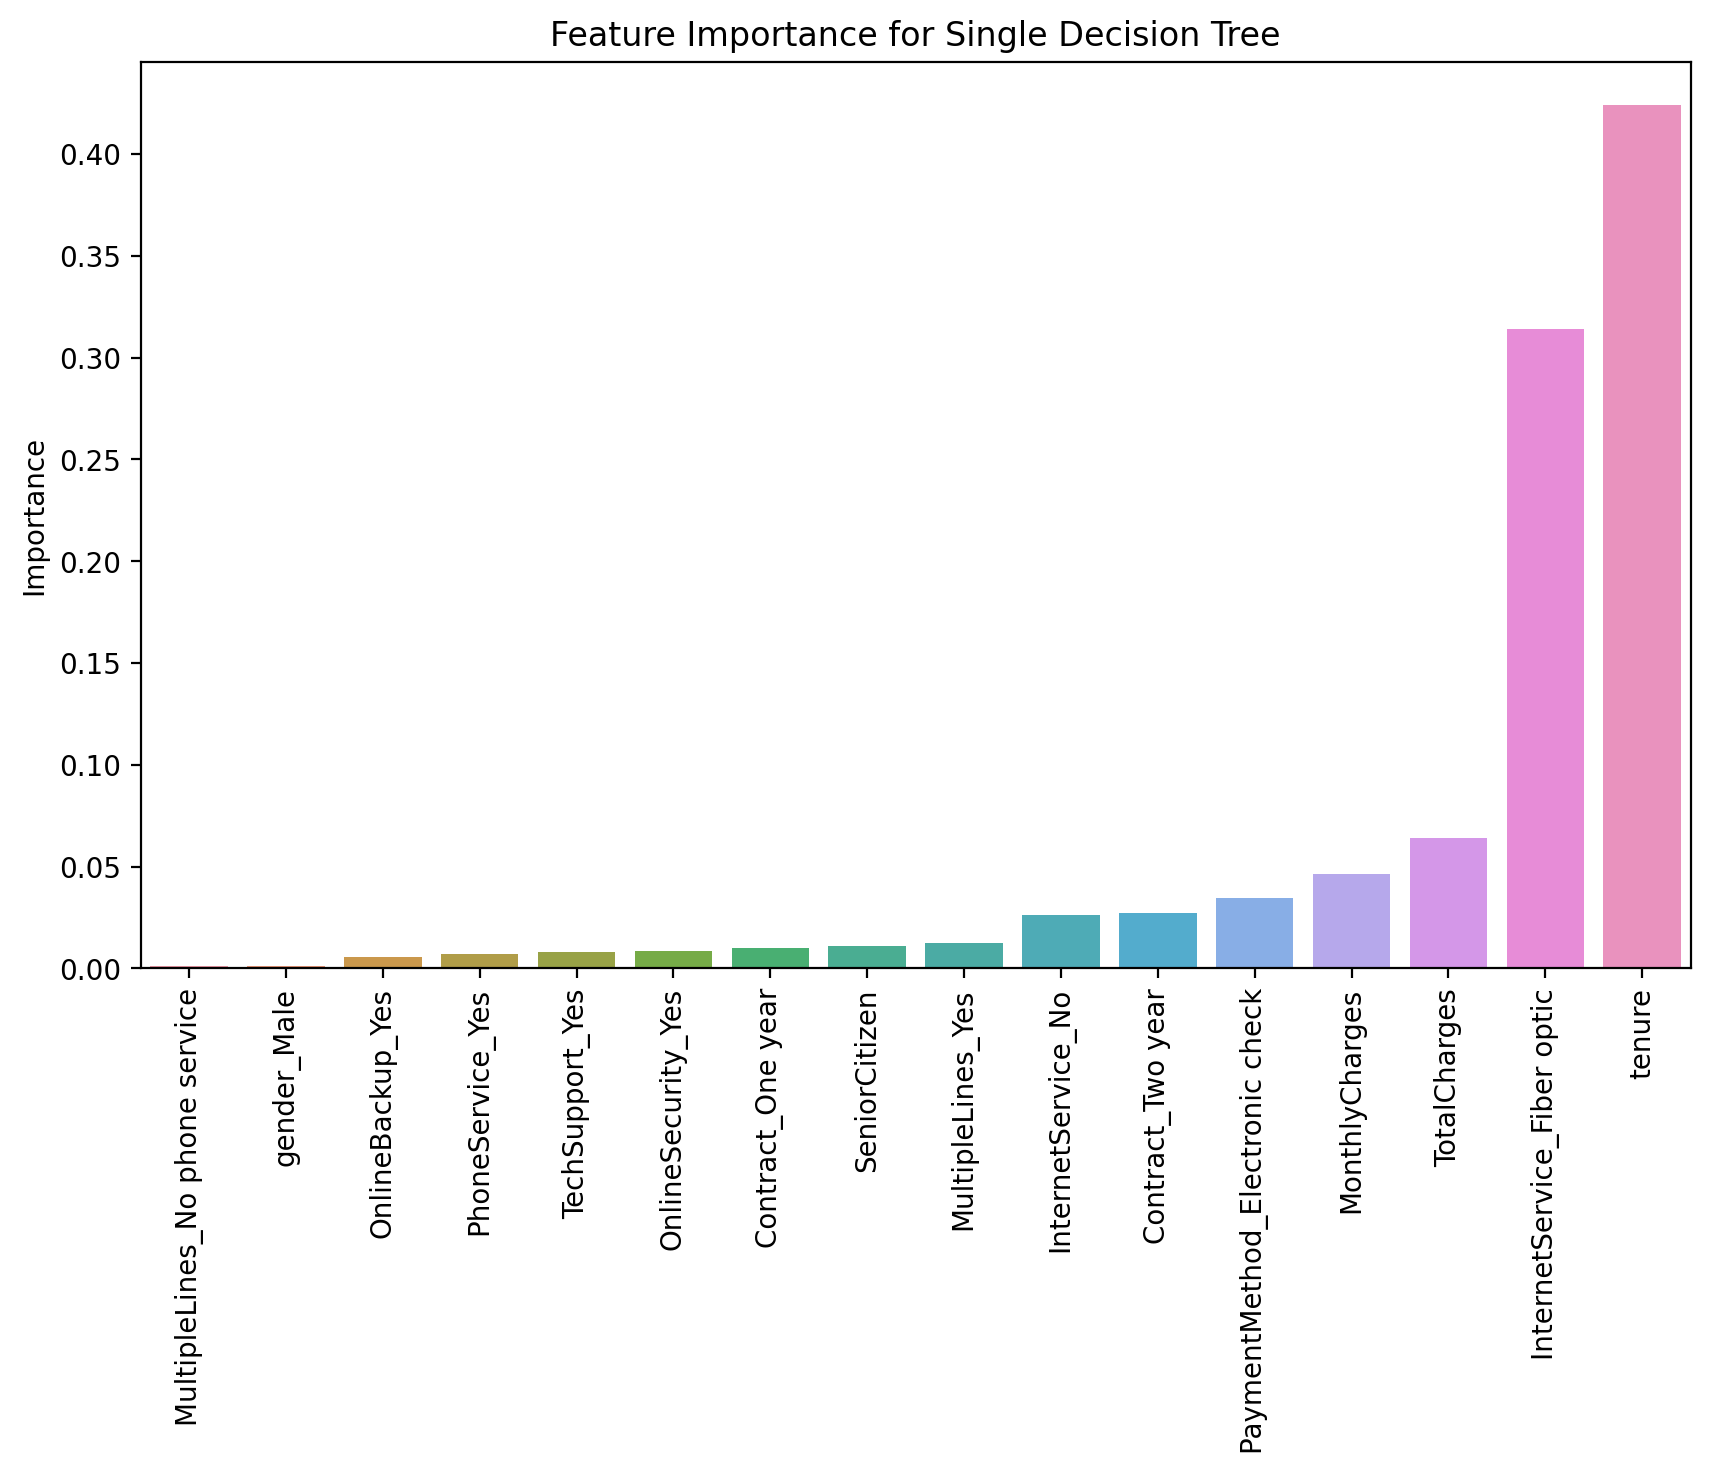

In [72]:
plt.figure(figsize=(10,6), dpi=200)

sns.barplot(data=plot_imp,
            x=plot_imp.index,
            y='Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance for Single Decision Tree')

plt.show()

In [73]:
from sklearn.tree import plot_tree

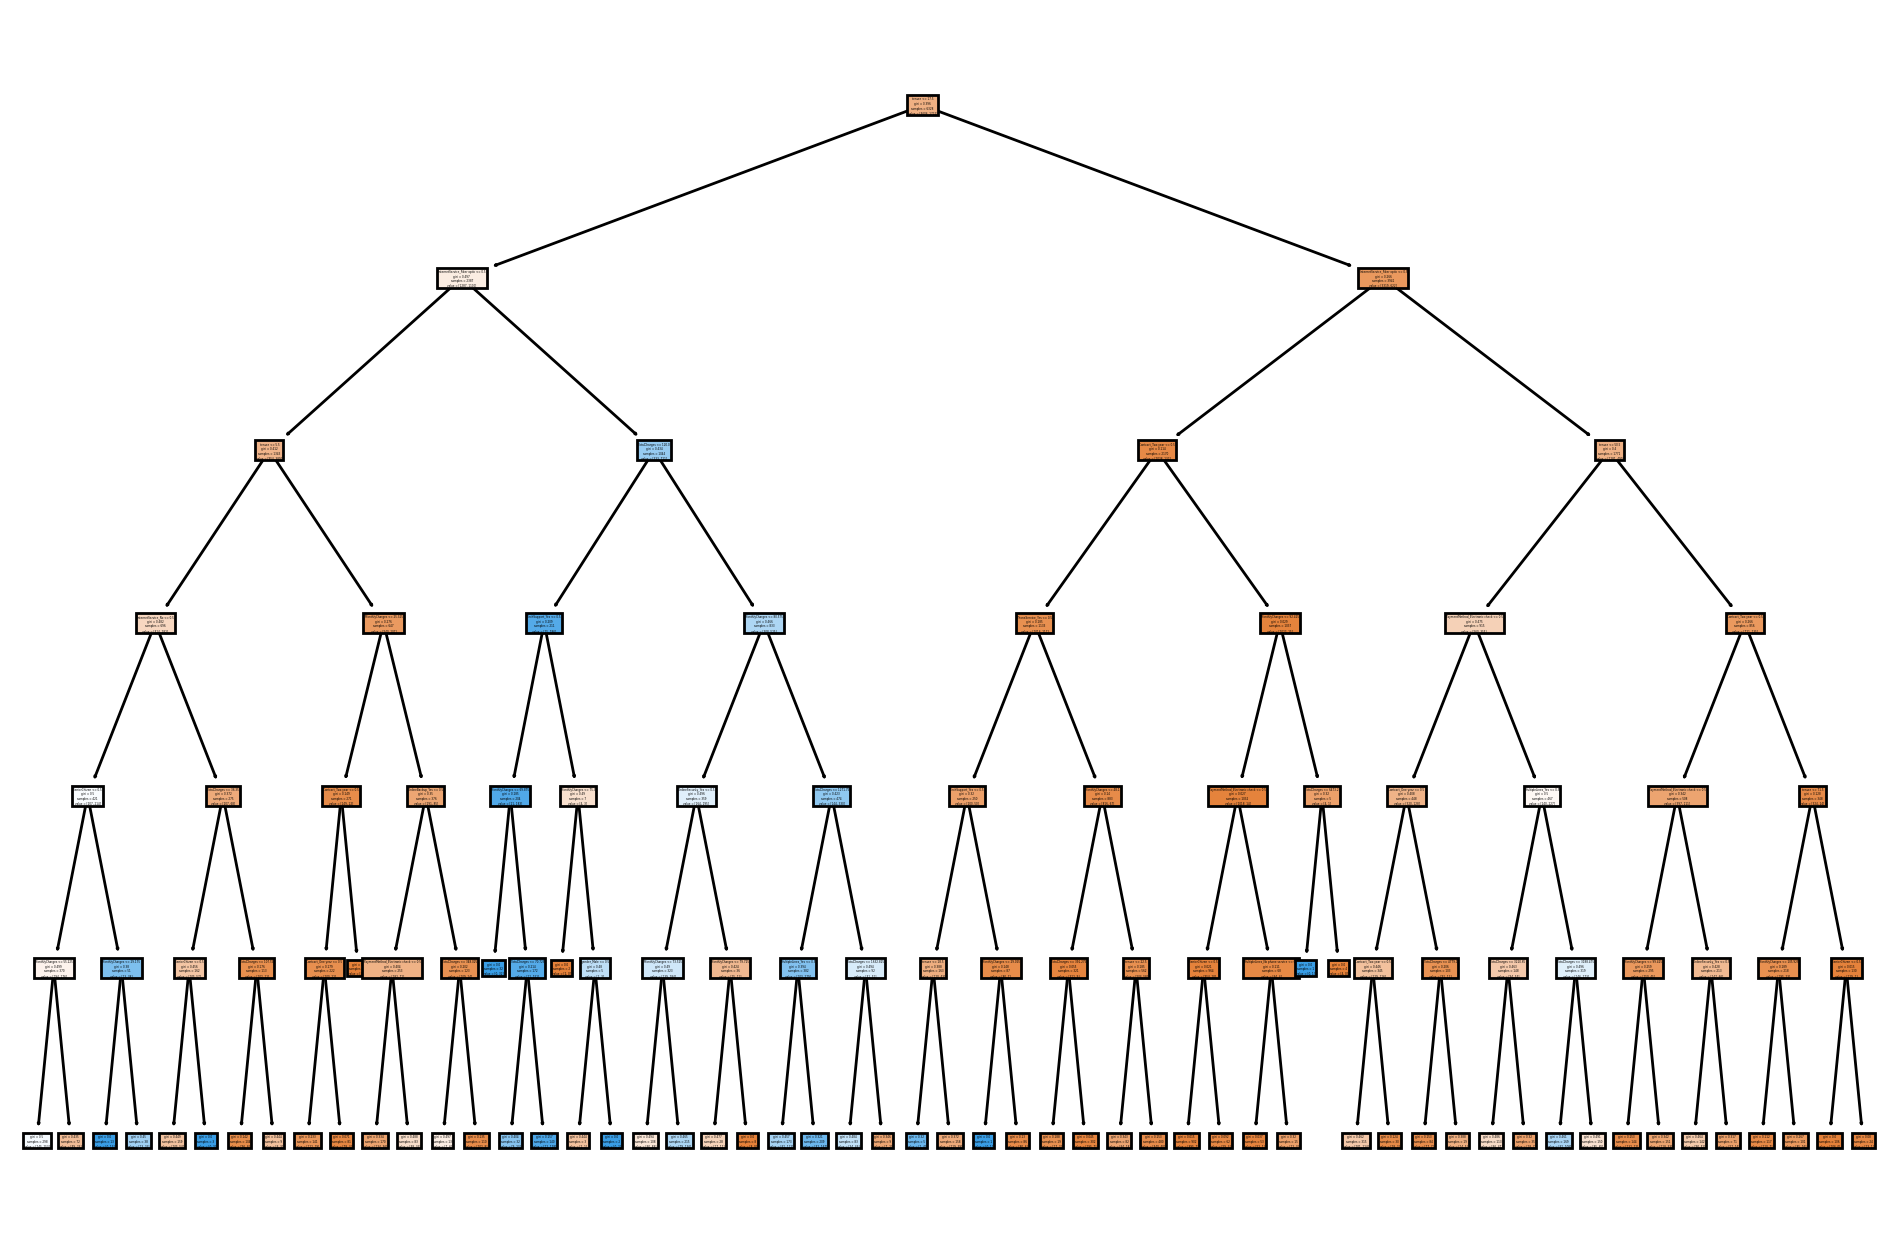

In [74]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [76]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]  # does not affect training of the model, only possible when bootstrap=True

In [77]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'oob_score': oob_score}

In [78]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)
grid.fit(X_train, y_train)

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tr

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tr

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tr

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tr

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.78460846 0.78808422 0.78666329 0.78855928 0.78840155 0.79013868
 0.78919069 0.78871626 0.7882422  0.78602864 0.7871361  0.79013931
 0.78871613 0.78650469 0.78745169 0.78934779 0.79045476 0.78824332
 0.78555645 0.78492429 0.7912454  0.79013806 0.79013881 0.79171871
        nan 0.78429288        nan 0.78603001        nan 0.78302731
        nan 0.78334351        nan 0.77939269        nan 0.78413328
        nan 0.78634634        nan 0.78603001        nan 0.78018345
        nan 0.78334251        nan 0.78524074        nan 0.78397542]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [79]:
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 200, 'oob_score': False}

In [80]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.45      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



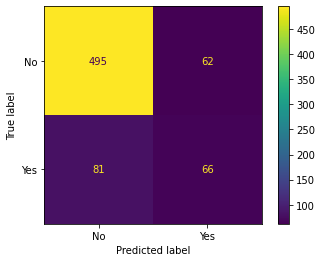

In [81]:
plot_confusion_matrix(grid, X_test, y_test);

In [82]:
rf = RandomForestClassifier(max_depth=6)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
# RECALL IS IMPORTANT IN THIS APPLICATION

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.61      0.44      0.51       147

    accuracy                           0.83       704
   macro avg       0.74      0.68      0.70       704
weighted avg       0.81      0.83      0.81       704



## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [86]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

0.8295454545454546


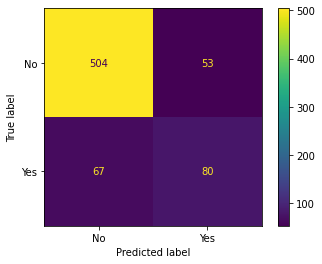

In [93]:
# default AdaBoost model 
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(ada, X_test, y_test);

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [84]:
error_rates = []
N = len(X.columns) + 1

for n in range(1, N):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(err)

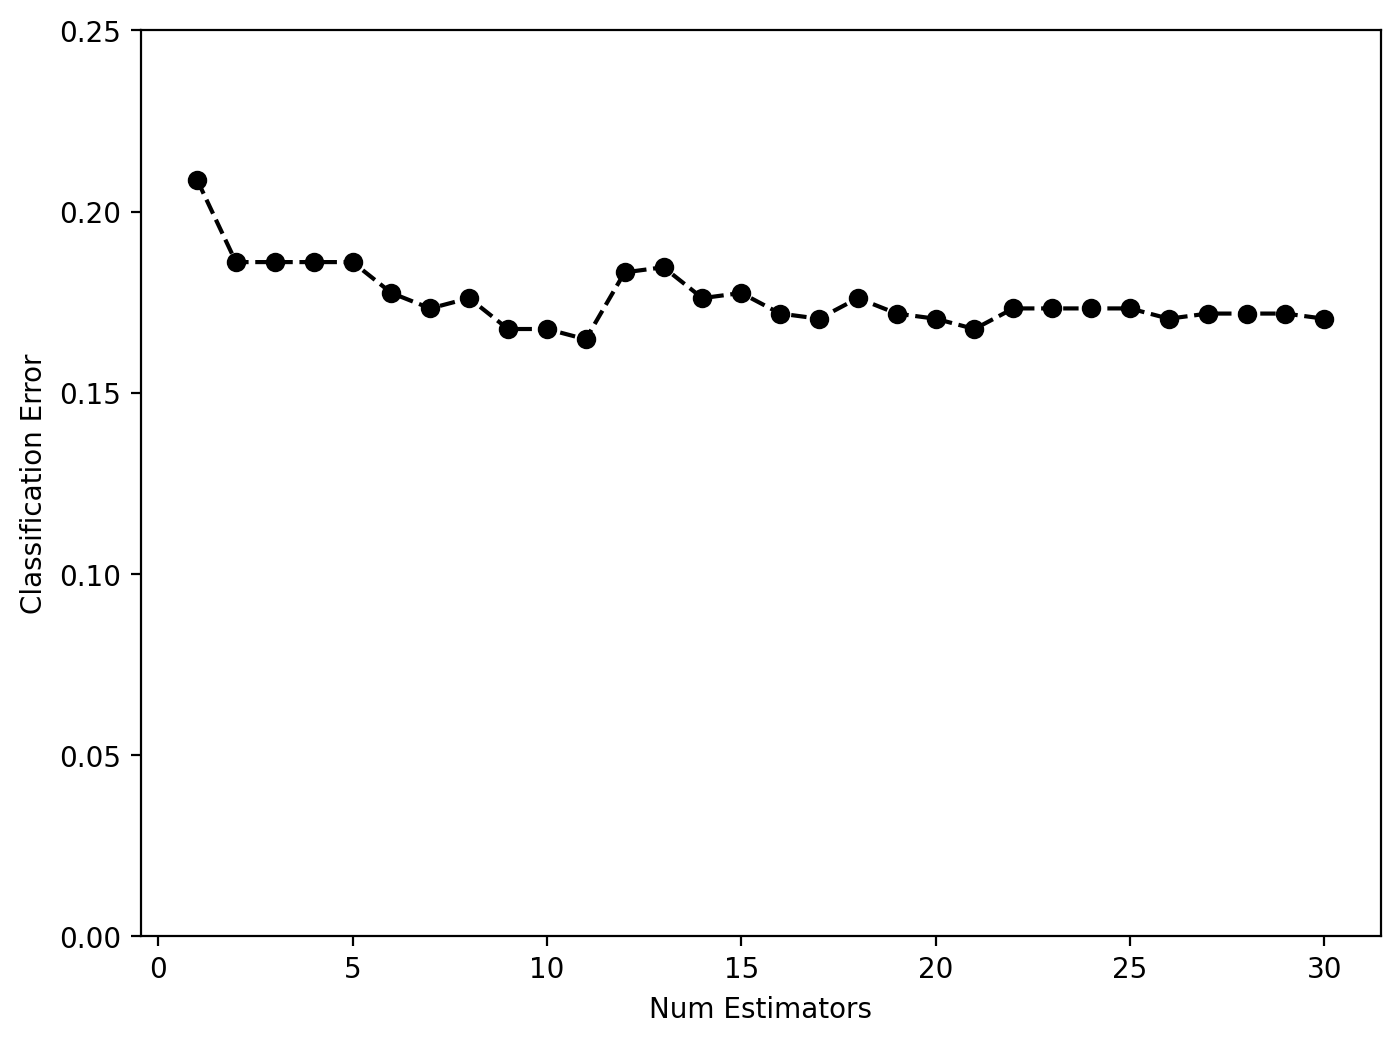

In [85]:
plt.figure(figsize=(8,6), dpi=200)
plt.plot(range(1, N), error_rates, 'ko--')
plt.xlabel('Num Estimators')
plt.ylabel('Classification Error')
plt.ylim(0, 0.25)
# plt.xlim(0, 32)
plt.show()

In [88]:
model = AdaBoostClassifier(n_estimators=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.94      0.90       557
         Yes       0.65      0.45      0.53       147

    accuracy                           0.84       704
   macro avg       0.76      0.69      0.72       704
weighted avg       0.82      0.84      0.82       704



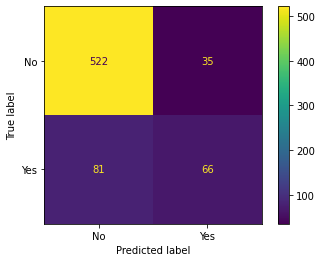

In [89]:
plot_confusion_matrix(model, X_test, y_test);

In [92]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [95]:
# grid search on Ada boost
abm = AdaBoostClassifier(n_estimators=100)
abm.fit(X_train, y_train)
y_pred = abm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



Ada Boosted Model achieved an accuracy of 84% when we choose 11 estimators.

## Support Vector Machines

In [96]:
from sklearn.svm import SVC

In [97]:
svm = SVC()

param_grid = {'C': [0.01, 0.1, 1.0]}#,
# 'C': [0.001, 0.05, 0.01, 0.5, 0.1, 1],
#               'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}#,
#               'gamma': ['auto', 'scale']}

grid = GridSearchCV(svm, param_grid, cv=10, verbose=2)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END .............................................C=0.01; total time=   2.1s
[CV] END .............................................C=0.01; total time=   2.0s
[CV] END .............................................C=0.01; total time=   1.9s
[CV] END .............................................C=0.01; total time=   2.1s
[CV] END .............................................C=0.01; total time=   2.5s
[CV] END .............................................C=0.01; total time=   2.8s
[CV] END .............................................C=0.01; total time=   2.5s
[CV] END .............................................C=0.01; total time=   2.6s
[CV] END .............................................C=0.01; total time=   3.1s
[CV] END .............................................C=0.01; total time=   2.2s
[CV] END ..............................................C=0.1; total time=   2.1s
[CV] END .......................................

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': [0.01, 0.1, 1.0]},
             verbose=2)

In [98]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.79      1.00      0.88       557
         Yes       0.00      0.00      0.00       147

    accuracy                           0.79       704
   macro avg       0.40      0.50      0.44       704
weighted avg       0.63      0.79      0.70       704



C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


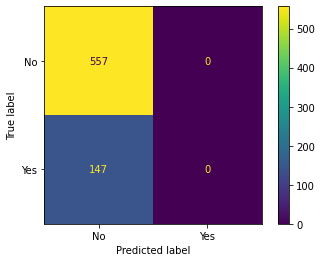

In [99]:
plot_confusion_matrix(grid, X_test, y_test);

## Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
log_model = LogisticRegressionCV(cv=10)
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))